# Analysis
After reading in the dataset, we'll look at several variable correlations:
- Mean Income vs Days to Close
- Population vs Days to Close
- Number of Complaints vs Days to Close
- Number of Complaints vs Median Age

We'll proceed with grouped analysis to identify trends using bins and groupby to partition the data. A visual analysis will be provided through heatmaps. Finally, we'll use the gender specific data from the Census to look at correlations between female age groups and the number of complaints, utilizing a scatter plot and bar graph to view possible correlation.

Based on the grouped analysis, we'll include one final dataframe of zip codes that fit both "high complaining" subgroups, and provide a simple summary statistic table of average stats for zip codes that fit those demographics.

In [1]:
#import dependencies
import pandas as pd
import requests
import json
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy.stats as st
import gmaps
from census import Census
from us import states
import numpy as np
from scipy.stats import linregress
from config import google_key

#Configure gmaps
gmaps.configure(api_key=google_key)
gmap_url = 'https://maps.googleapis.com/maps/api/geocode/json?address='

#CSV files path
data_path = './Resources/FullDataSet.csv'

#Dataframe creation
data_df = pd.read_csv(data_path)

In [2]:
data_df.head()

,Zip Code,Population,White Population (%),Poverty Count,Household Income ($),Per Capita Income ($),Median Age,Male Median Age,Female Median Age,Fem. 20-24 (%),Fem. 25-29 (%),Fem. 30-34 (%),Fem. 35-44 (%),Fem. 45-54 (%),No. of Complaints,% of Complaints,Most Utilized Source,Avg. Days to Close
0,64133,35163,59.30,4690,50681,26720,40.8,44.1,49.4,1.53,1.79,1.78,3.64,4.54,1767,3.68,PHONE,26.83
1,64131,22932,51.50,4021,45688,30411,37.2,38.9,43.2,1.87,2.01,3.39,2.50,3.26,4134,8.60,WEB,25.71
2,64130,19996,7.37,5238,31166,21925,39.3,29.6,29.5,0.40,0.70,0.23,0.77,0.18,2163,4.50,PHONE,23.80
3,64119,27848,83.75,1785,68841,33224,38.3,39.7,43.2,2.56,3.53,3.44,5.15,6.15,1177,2.45,PHONE,26.79
4,64134,23874,28.45,5507,41543,20078,31.3,47.1,45.5,0.62,1.19,1.29,1.62,1.61,2533,5.27,WEB,20.01


## Mean Income vs. Days to Close

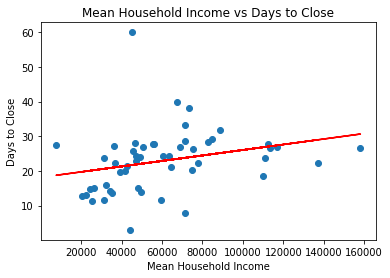

Correlation: 0.2736934625936768


In [3]:
#Mean Household Income vs Days to Close
mean_income = data_df['Household Income ($)']
close_days = data_df['Avg. Days to Close']

plt.scatter(mean_income, close_days)
plt.xlabel('Mean Household Income')
plt.ylabel('Days to Close')
plt.title('Mean Household Income vs Days to Close')

x_values = mean_income
y_values = close_days

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

plt.savefig('./Images/income_v_days_to_close.png')

plt.show()
correlation = st.pearsonr(mean_income, close_days)
print(f"Correlation: {correlation[0]}")

## Population vs. Days to Close

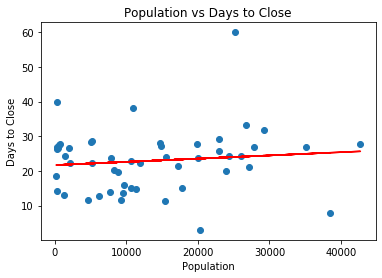

Correlation: 0.11240716013419295


In [4]:
#Population vs Days to Close
population = data_df['Population']
close_days = data_df['Avg. Days to Close']

plt.scatter(population, close_days)
plt.xlabel('Population')
plt.ylabel('Days to Close')
plt.title('Population vs Days to Close')

x_values = population
y_values = close_days

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

plt.savefig('./Images/population_v_days_to_close.png')

plt.show()
correlation = st.pearsonr(population, close_days)
print(f"Correlation: {correlation[0]}")

## Number of Complaints vs. Days to Close

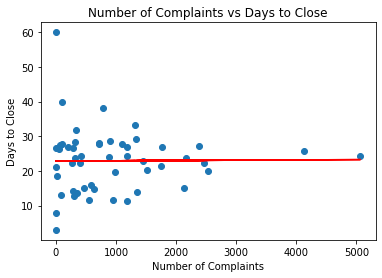

Correlation: 0.009515665762888016


In [5]:
#No of Complaints vs Days to Close
#Note - pulling columns from groupby_mean and groupby_counts datasets*
complaints = data_df['No. of Complaints']
close_days = data_df['Avg. Days to Close']


plt.scatter(complaints, close_days)
plt.xlabel('Number of Complaints')
plt.ylabel('Days to Close')
plt.title('Number of Complaints vs Days to Close')

x_values = complaints
y_values = close_days

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

plt.savefig('./Images/no_complaints_v_days_to_close.png')


plt.show()
correlation = st.pearsonr(complaints, close_days)
print(f"Correlation: {correlation[0]}")

## Number of Complaints vs Median Age

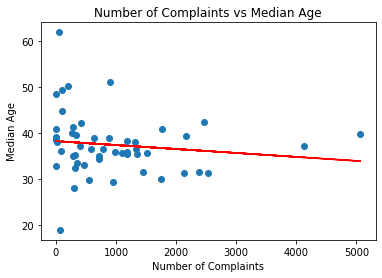

Correlation: -0.13161024526863874


In [6]:
#No. of Complaints vs. Median Age
complaints = data_df['No. of Complaints']
median_age = data_df['Median Age']

plt.scatter(complaints, median_age)
plt.xlabel('Number of Complaints')
plt.ylabel('Median Age')
plt.title('Number of Complaints vs Median Age')

x_values = complaints
y_values = median_age

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

plt.savefig('./Images/no_complaints_v_median_age.png')

plt.show()

correlation = st.pearsonr(complaints, median_age)
print(f"Correlation: {correlation[0]}")

## Grouped Analysis
#### Rather than continue to mash variables together, binned data can help identify subsets that may have stronger evidence for our hypothesis.
### Median Age Groups

In [7]:
# Visualize the range of median ages represented to prepare bin groups
median_age_list = data_df["Median Age"].unique()
median_age_list.sort()
print(median_age_list)

[19.  28.  29.5 29.8 30.  31.3 31.4 31.5 31.6 32.4 32.8 33.  33.6 34.4
 35.  35.3 35.4 35.5 35.7 35.8 35.9 36.2 36.5 36.6 37.2 37.3 38.  38.3
 38.6 38.9 39.1 39.3 39.6 39.9 40.1 40.8 40.9 41.3 42.3 42.5 44.9 48.6
 49.3 50.3 51.2 61.9]


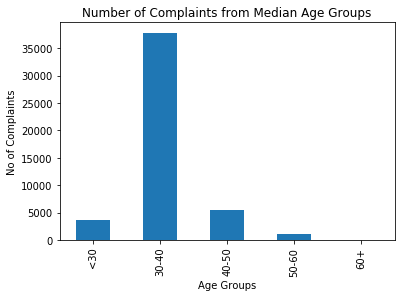

In [8]:
# Creating median age categories
bins = [0,30,40,50,60,70]
names = ['<30','30-40','40-50','50-60','60+']

data_df['Median Age Group'] = pd.cut(data_df['Median Age'], bins, labels = names, include_lowest=True)

#Median Age Groups vs No of Complaints
complaints = data_df.groupby(['Median Age Group'])['No. of Complaints'].sum()

complaints.plot.bar()
plt.xlabel('Age Groups')
plt.ylabel('No of Complaints')
plt.title('Number of Complaints from Median Age Groups')
plt.savefig('./Images/complaints_by_age_bar.png')
plt.show()

### Household Income Groups

In [9]:
# Visualize the range of household incomes represented to prepare bin groups
income = data_df['Household Income ($)'].unique()
income.sort()
print(income)

[  7622  20699  22328  24421  25472  26512  31140  31166  32131  34417
  35290  36074  36538  39396  41543  42550  43965  44971  45688  46514
  46915  47324  48105  49352  49500  50681  55690  56250  59474  60667
  63694  64489  67250  68841  71190  71598  71611  73458  74864  75536
  77874  82739  84614  88919 109844 111000 112481 113553 116719 136913
 158125]


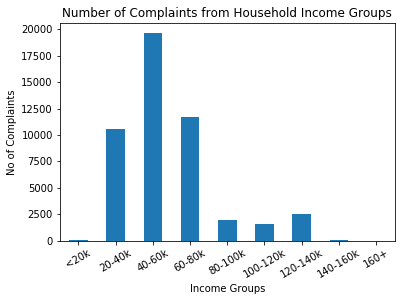

In [10]:
# Creating median income group categories
bins = [0,20000,40000,60000,80000,100000,120000,140000,160000,180000]
names = ['<20k','20-40k','40-60k','60-80k','80-100k','100-120k','120-140k','140-160k','160+']

data_df['Household Income Group'] = pd.cut(data_df['Household Income ($)'],bins, labels = names, include_lowest=True)

#Household Income Groups vs No of Complaints
complaints = data_df.groupby(['Household Income Group'])['No. of Complaints'].sum()

complaints.plot.bar()
plt.xlabel('Income Groups')
plt.ylabel('No of Complaints')
plt.title('Number of Complaints from Household Income Groups')
plt.xticks(rotation=30)
plt.savefig('./Images/income_v_no_complaints.png')
plt.show()

## Heatmapping
#### Using a heatmap can help us geographically identify location-based trends in complaints

In [11]:
#Ten highest number of complaints by zip code
top_ten = data_df.sort_values('No. of Complaints', ascending=False).head(10)
top_ten.reset_index(inplace=True)
top_ten[["Zip Code", "No. of Complaints"]]

,Zip Code,No. of Complaints
0,64114,5066
1,64131,4134
2,64134,2533
3,64113,2467
4,64132,2384
5,64130,2163
6,64111,2125
7,64133,1767
8,64110,1749
9,64112,1514


### Complaints from the Top 10 Zip Codes

In [12]:
# Generating the heatmap weights and locations for the top ten zip codes
zip_coords = []

for zipcode in top_ten["Zip Code"].tolist():
    geo_data = requests.get(gmap_url+str(zipcode)+'&key='+google_key).json()
    zip_coords.append({
         'lat': geo_data['results'][0]['geometry']['location']['lat'],
         'lng': geo_data['results'][0]['geometry']['location']['lng']})
locations10 = pd.DataFrame(zip_coords)[['lat','lng']]

rating10 = top_ten['No. of Complaints']

In [13]:
# Viewing the heatmap
layout = {'width': '600px', 'height': '300px', 'border': '1px solid black', 'padding': '1px'}

fig1 = gmaps.figure(layout=layout)
heat_layer = gmaps.heatmap_layer(locations10, weights=rating10, dissipating = False, max_intensity=5000, point_radius=.03)
fig1.add_layer(heat_layer)

fig1

Figure(layout=FigureLayout(border='1px solid black', height='300px', padding='1px', width='600px'))

### Complaints from all Zip Codes

In [14]:
# Generating the heatmap weights and locations for every zip code
zip_coords = []

for zipcode in data_df['Zip Code'].tolist():
    geo_data = requests.get(gmap_url+str(zipcode)+'&key='+google_key).json()
    zip_coords.append({
         'lat': geo_data['results'][0]['geometry']['location']['lat'],
         'lng': geo_data['results'][0]['geometry']['location']['lng']})
locations_all = pd.DataFrame(zip_coords)[['lat','lng']]

rating_all = data_df['No. of Complaints']

In [15]:
# Viewing the heatmap
layout = {'width': '600px', 'height': '300px', 'border': '1px solid black', 'padding': '1px'}

fig2 = gmaps.figure(layout=layout)
heat_layer = gmaps.heatmap_layer(locations_all, weights=rating_all, dissipating = False, max_intensity=5000, point_radius=.03)
fig2.add_layer(heat_layer)

fig2

Figure(layout=FigureLayout(border='1px solid black', height='300px', padding='1px', width='600px'))

## Female Age Groups vs Number of Complaints
#### Using the Census data on different female age groups, we'll identify a tighter subset of populations (above 10,000) and look at complaints per 1000 persons. Then we'll compare the correlation across the age groups.

In [16]:
# Trim down the dataframe to zip code, population, complaints, and female age percentages
per_thousand = data_df[["Zip Code", 
                        "Population", 
                        'Fem. 20-24 (%)', 
                        'Fem. 25-29 (%)',
                        'Fem. 30-34 (%)',
                        'Fem. 35-44 (%)',
                        'Fem. 45-54 (%)',
                        'No. of Complaints'
                       ]].copy()

# Generate a new column of data by calculating complaints per 1000
per_thousand['Complaints per 1000'] = round(per_thousand['No. of Complaints'] / (per_thousand['Population'] / 1000), 0).astype(int)
per_thousand.sort_values(["Complaints per 1000"], ascending=False, inplace=True)

# Restrict the dataframe to only larger populations above 10,000
per_thousand = per_thousand.loc[per_thousand["Population"] > 10000].reset_index(drop=True)
per_thousand.head()

,Zip Code,Population,Fem. 20-24 (%),Fem. 25-29 (%),Fem. 30-34 (%),Fem. 35-44 (%),Fem. 45-54 (%),No. of Complaints,Complaints per 1000
0,64114,24405,1.12,5.46,4.55,4.82,4.59,5066,208
1,64113,11988,0.80,2.33,4.00,6.11,6.79,2467,206
2,64131,22932,1.87,2.01,3.39,2.50,3.26,4134,180
3,64132,14817,0.70,1.47,0.12,0.68,1.19,2384,161
4,64137,10646,2.51,3.87,3.36,1.92,2.71,1443,136


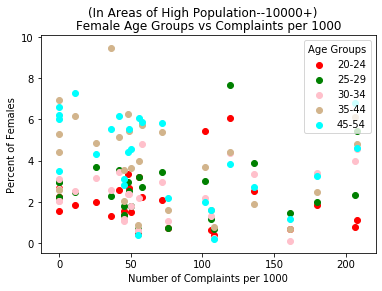

In [17]:
# Build a single scatter plot with every set of age group percentage points
plt.scatter(per_thousand['Complaints per 1000'], per_thousand['Fem. 20-24 (%)'], label='20-24', color='red')
plt.scatter(per_thousand['Complaints per 1000'], per_thousand['Fem. 25-29 (%)'], label='25-29', color='green')
plt.scatter(per_thousand['Complaints per 1000'], per_thousand['Fem. 30-34 (%)'], label='30-34', color='pink')
plt.scatter(per_thousand['Complaints per 1000'], per_thousand['Fem. 35-44 (%)'], label='35-44', color='tan')
plt.scatter(per_thousand['Complaints per 1000'], per_thousand['Fem. 45-54 (%)'], label='45-54', color='aqua')

plt.title("Female Age Groups vs Complaints per 1000")
plt.suptitle("(In Areas of High Population--10000+)")
plt.xlabel('Number of Complaints per 1000')
plt.ylabel('Percent of Females')
plt.legend(title= "Age Groups")
plt.savefig('./Images/fem_age_groups_v_no_complaints.png')
plt.show()

The correlation for 20-24 (%) is -0.10747959640103681
The correlation for 25-29 (%) is 0.15531751193510776
The correlation for 30-34 (%) is 0.21186376075220084
The correlation for 35-44 (%) is -0.29578872128050593
The correlation for 45-54 (%) is -0.322704736064998


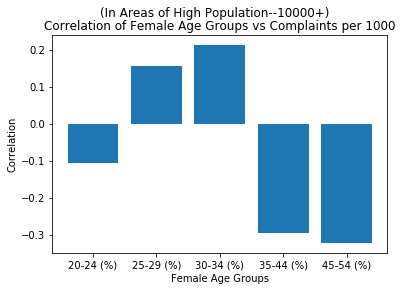

In [18]:
# Finding the correlation of age groups vs areas with the highest complaints per 1000 metric
fem_age_groups = ["20-24 (%)", 
                  "25-29 (%)", 
                  "30-34 (%)", 
                  "35-44 (%)", 
                  "45-54 (%)"]
table = []

for group in fem_age_groups:
    comp_1000 = per_thousand['Complaints per 1000']
    percent = per_thousand["Fem. " + group]
    correlation = st.pearsonr(comp_1000, percent)
    table.append({'Age Group': group,'Correlation':correlation[0]})
    print(f"The correlation for {group} is {correlation[0]}")
table_df = pd.DataFrame(table)

# View the correlations in a single bar graph
plt.bar(table_df['Age Group'],table_df['Correlation'])
plt.title("Correlation of Female Age Groups vs Complaints per 1000")
plt.suptitle("(In Areas of High Population--10000+)")
plt.xlabel('Female Age Groups')
plt.ylabel('Correlation')
plt.savefig('./Images/corr_fem_age_groups_v_no_complaints.png')
plt.show()

## The "Complainer" Zipcodes
#### Utilizing the earlier charts, we can limit our dataset to only grouped datasets with the highest complaints for those variables. This gives us a dense dataframe that presents some basics of top complaining zip codes from our dataset.

In [19]:
# Finding the areas of the "most-complained" groups
mostcomplaint_agegroup = data_df[data_df["Median Age Group"]=="30-40"]
mostcomplaint_incomegroup = data_df[data_df["Household Income Group"]=="40-60k"]
mostcomplaint_ageincome = pd.merge(mostcomplaint_agegroup, mostcomplaint_incomegroup)
mostcomplaint_ageincome['Complaints per 1000'] = round(mostcomplaint_ageincome['No. of Complaints'] / (mostcomplaint_ageincome['Population'] / 1000), 0).astype(int)
mostcomplaint_ageincome.sort_values(["Complaints per 1000"], ascending=False, inplace=True)
mostcomplaint_ageincome.reset_index(drop=True)

,Zip Code,Population,White Population (%),Poverty Count,Household Income ($),Per Capita Income ($),Median Age,Male Median Age,Female Median Age,Fem. 20-24 (%),...,Fem. 30-34 (%),Fem. 35-44 (%),Fem. 45-54 (%),No. of Complaints,% of Complaints,Most Utilized Source,Avg. Days to Close,Median Age Group,Household Income Group,Complaints per 1000
0,64131,22932,51.50,4021,45688,30411,37.2,38.9,43.2,1.87,...,3.39,2.50,3.26,4134,8.60,WEB,25.71,30-40,40-60k,180
1,64108,7799,61.70,1590,49500,39759,35.4,35.6,33.8,2.91,...,3.85,3.00,2.81,1342,2.79,PHONE,14.06,30-40,40-60k,172
2,64137,10646,56.81,1836,47324,23454,31.5,31.6,35.0,2.51,...,3.36,1.92,2.71,1443,3.00,PHONE,22.84,30-40,40-60k,136
3,64111,17801,78.96,2691,48105,35777,31.4,32.6,30.2,6.06,...,4.38,4.43,3.82,2125,4.42,PHONE,15.00,30-40,40-60k,119
4,64134,23874,28.45,5507,41543,20078,31.3,47.1,45.5,0.62,...,1.29,1.62,1.61,2533,5.27,WEB,20.01,30-40,40-60k,106
5,64116,15576,79.08,1662,49352,36730,38.9,38.4,46.0,3.20,...,2.17,3.96,6.05,875,1.82,PHONE,24.09,30-40,40-60k,56
6,64117,14673,75.99,2530,46514,22841,35.0,36.5,37.3,3.37,...,2.39,6.24,4.44,710,1.48,PHONE,27.99,30-40,40-60k,48
7,64138,26032,44.48,4334,46915,24402,35.9,40.7,47.4,1.58,...,1.18,2.04,2.80,1178,2.45,PHONE,24.36,30-40,40-60k,45
8,64118,42706,77.31,5711,55690,27636,35.7,38.4,41.4,1.98,...,3.16,4.86,4.34,1101,2.29,WEB,27.64,30-40,40-60k,26
9,64030,25150,51.79,3753,44971,23066,32.8,34.9,36.0,2.24,...,2.03,2.56,3.50,2,0.00,PHONE,60.00,30-40,40-60k,0


In [20]:
# The average statistics of the 10 complainers zipcodes (from both high-complaining groups)
mostcomplaint_ageincome.mean()

Zip Code                 64114.000
Population               20718.900
White Population (%)        60.607
Poverty Count             3363.500
Household Income ($)     47560.200
Per Capita Income ($)    28415.400
Median Age                  34.510
Male Median Age             37.470
Female Median Age           39.580
Fem. 20-24 (%)               2.634
Fem. 25-29 (%)               3.333
Fem. 30-34 (%)               2.720
Fem. 35-44 (%)               3.313
Fem. 45-54 (%)               3.534
No. of Complaints         1544.300
% of Complaints              3.212
Avg. Days to Close          26.170
Complaints per 1000         88.800
dtype: float64